<a href="https://colab.research.google.com/github/mcalmeida13/marketing-attribution-model/blob/main/rfm_analysis_for_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import squarify
import matplotlib.pyplot as plt

https://www.kaggle.com/busrayaman/customer-segmentation-with-rfm-analysis

In [ ]:
path='/content/drive/MyDrive/Data Science/Datasets/online_retail_II.xlsx'
df_2010_2011 = pd.read_excel(path, sheet_name = "Year 2010-2011")

**InvoiceNo:** Invoice number. It is a unique value. If this code starts with C, it means refund.

**StockCode:** Product code. Unique number for each product

**Description:** Product name

**Quantity:** Number of products. It means how 
many of the products in the invoices are sold. 
Those who start with C get negative value

**InvoiceDate:** Invoice date and time

**UnitPrice:** Product price (in pounds)

**CustomerID:** Customer number. Unique number for each customer

**Country:** Country name. Refers to the country where the customer lives

In [ ]:
df = df_2010_2011.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.dropna(inplace = True)

In [ ]:
#Changing type of Customer ID from float to int
df["Customer ID"] = df["Customer ID"].astype(int)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
df['TotalPrice'] = df['Quantity']*df['Price']

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
#checking the most refunded product by controlling the refund invoices (invoices which starts with 'C'): 
#again, we found that the most refunded product is paper craft little birdie

df_C = df[df["Invoice"].str.contains("C")==True]
df_C.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96


In [ ]:
df_C['Invoice'].unique()

array(['C536379', 'C536383', 'C536391', ..., 'C581499', 'C581568',
       'C581569'], dtype=object)

In [ ]:
# Removendo as devoluções para iniciar a análise
df['Invoice'] = df['Invoice'].astype('str')
df2 = df[~df['Invoice'].str.contains('C')]    
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Análise RFM

In [ ]:
df2.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,397925.0,13.021793,180.419984,1.0,1.00,1.00,1.00,2.00,6.00,12.00,24.00,36.0,120.00,80995.00
Price,397925.0,3.116212,22.096773,0.0,0.21,0.42,0.55,1.25,1.95,3.75,6.35,8.5,14.95,8142.75
Customer ID,397925.0,15294.308601,1713.172738,12346.0,12415.00,12627.00,12883.00,13969.00,15159.00,16795.00,17725.00,17912.0,18211.00,18287.00
TotalPrice,397925.0,22.394737,309.055200,0.0,0.55,1.25,1.95,4.68,11.80,19.80,35.40,67.5,202.50,168469.60


In [ ]:
#assigning today date as the 1 day after the max date
import datetime as dt
today_date = dt.datetime(2011,12,10)
today_date

datetime.datetime(2011, 12, 10, 0, 0)

In [ ]:
#Últma compra
df2.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346,2011-01-18 10:01:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00


#what should we do now?

#For each customer, we need to subtract the customers' last purchase date from today's date.
#and we will keep this as a temp data frame

In [ ]:
temp_df = (today_date - df2.groupby("Customer ID").agg({"InvoiceDate":"max"}))
temp_df.head()

,InvoiceDate
Customer ID,
12346,325 days 13:59:00
12347,2 days 08:08:00
12348,75 days 10:47:00
12349,18 days 14:09:00
12350,310 days 07:59:00


In [ ]:
#changing the name of InvoiceDate to Recency
temp_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)  

In [ ]:
recency_df = temp_df["Recency"].apply(lambda x: x.days)

# Frequency

In [ ]:
temp_df = df2.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
temp_df.head()

Invoice
Customer ID Invoice         
12346       541431         1
12347       537626        31
            542237        29
            549222        24
            556201        18

In [ ]:
#this shows how many different products each customer bought:
temp_df.groupby("Customer ID").agg({"Invoice":"sum"}).head() 

,Invoice
Customer ID,
12346,1
12347,182
12348,31
12349,73
12350,17


In [ ]:
#this shows how many times the customer did shopping:
temp_df.groupby("Customer ID").agg({"Invoice":"count"}).head() 

,Invoice
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


In [ ]:
#assigning this to a new dataframe called freq_df and changing the Invoice name to frequency
freq_df = temp_df.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace = True)
freq_df.head()

,Frequency
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


In [ ]:
#sorting the values from the highest to the lowest. the customer with most orders:17841
freq_df.sort_values("Frequency", ascending = False).head()

,Frequency
Customer ID,
12748,210
14911,201
17841,124
13089,97
14606,93


#Monetary

In [ ]:
#Monetary is the total spend of the customer.
# The sum of the TotalPrice values that we have calculated for each customer before is that customer's monetary value:

In [ ]:
monetary_df = df2.groupby("Customer ID").agg({"TotalPrice":"sum"})
monetary_df.head()

,TotalPrice
Customer ID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [ ]:
#finding the customer which we gained the most money from: 14646 (the customer with most orders is 17841 so they are not the same)
monetary_df.sort_values(by="TotalPrice", ascending=False).head(10)

,TotalPrice
Customer ID,
14646,280206.02
18102,259657.30
17450,194550.79
16446,168472.50
14911,143825.06
12415,124914.53
14156,117379.63
17511,91062.38
16029,81024.84


In [ ]:
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace = True)
monetary_df.head()

,Monetary
Customer ID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [ ]:
print(recency_df.shape, freq_df.shape, monetary_df.shape)

(4339,) (4339, 1) (4339, 1)


In [ ]:
#Lets bring all the values together under a new data frame called 'rfm':
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


In [ ]:
#Normally the smallest of the recency scoring, which is 1, is the best recency score. 
#However, we will define this in reverse and put the value 5 as the best recency value so that it will be the same as the others, 
#so score 5 will be the most recent and the best recency score:

rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])

In [ ]:
rfm["Frequency"].describe([0.01,0.05,0.10,0.25,0.50,0.60,0.75,0.90,0.95, 0.99]).T

count    4339.000000
mean        4.271952
std         7.705493
min         1.000000
1%          1.000000
5%          1.000000
10%         1.000000
25%         1.000000
50%         2.000000
60%         3.000000
75%         5.000000
90%         9.000000
95%        13.000000
99%        30.000000
max       210.000000
Name: Frequency, dtype: float64

In [ ]:
cut_bins = [0,1,2,3,9,210]

rfm["FrequencyScore"] = pd.cut(rfm["Frequency"], bins = cut_bins, labels = [1, 2, 3, 4, 5])
rfm["FrequencyScore"].value_counts()

1    1494
4    1111
2     835
3     508
5     391
Name: FrequencyScore, dtype: int64

In [ ]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,325,1,77183.60,1,1,5
12347,2,7,4310.00,5,4,5
12348,75,4,1797.24,2,4,4
12349,18,1,1757.55,4,1,4
12350,310,1,334.40,1,1,2


In [ ]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0,92.041484,100.007757,0.0,17.000,50.00,141.50,373.00
Frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.00,210.00
Monetary,4339.0,2053.797166,8988.247836,0.0,307.245,674.45,1661.64,280206.02


In [ ]:
rfm["RFM_SCORE"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,325,1,77183.60,1,1,5,115
12347,2,7,4310.00,5,4,5,545
12348,75,4,1797.24,2,4,4,244
12349,18,1,1757.55,4,1,4,414
12350,310,1,334.40,1,1,2,112


In [ ]:
#Essa última coluna pode ajudar da seguinte forma, 
# quero filtrar alquem com RFM = 115
rfm[rfm['RFM_SCORE'] == '115']

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,325,1,77183.60,1,1,5,115
12501,336,1,2169.39,1,1,5,115
13135,196,1,3096.00,1,1,5,115
14439,319,1,2661.24,1,1,5,115


In [ ]:
# Retornará os ids pronts para serem utilizados em ferramentas de marketing

In [ ]:
#To segment the customers using “Recency” and “Frequency” values: 
#set up regular expression (regex) structure by using dictionaries to name Customer Segments according to 
#Recency and Frequency Scores:

seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [ ]:
#recency ve frequency points are obtained with the following code 
#(as the monetary is a similar value to frequency, it is not considered here):
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'].head()

Customer ID
12346    11
12347    54
12348    24
12349    41
12350    11
Name: Segment, dtype: object

In [ ]:
#Pull the value corresponding to the ranges of the score in the dictionary defined in 'seg_map', 
#and add it as a new column named "Segment":

rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,325,1,77183.60,1,1,5,115,Hibernating
12347,2,7,4310.00,5,4,5,545,Champions
12348,75,4,1797.24,2,4,4,244,At Risk
12349,18,1,1757.55,4,1,4,414,Promising
12350,310,1,334.40,1,1,2,112,Hibernating


In [ ]:
#Retrieve statistical values of recency, frequency and monetary values by segment classes:
rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
About to Sleep        51.993724   478   1.382845   478   522.695628   478
At Risk              135.371053   380   4.021053   380  1603.312397   380
Can't Lose           136.833333    12  14.916667    12  4150.677500    12
Champions              5.380795   604  12.869205   604  7125.645513   604
Hibernating          208.102622  1335   1.279401  1335   512.028009  1335
Loyal Customers       32.281977   688   7.142442   688  3213.158257   688
Need Attention        50.289256   121   3.000000   121  1167.569587   121
New Customers          6.716418    67   1.000000    67   348.637612    67
Potential Loyalists   15.925620   484   2.423554   484  1211.232707   484
Promising             23.011765   170   1.000000   170   314.936000   170

In [ ]:
rfm[rfm["Segment"] == "Need Attention"]

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12360,52,3,2662.06,3,3,5,335,Need Attention
12372,71,3,1298.04,3,3,4,334,Need Attention
12413,66,3,758.10,3,3,3,333,Need Attention
12456,44,3,3181.04,3,3,5,335,Need Attention
12536,43,3,12601.83,3,3,5,335,Need Attention
...,...,...,...,...,...,...,...,...
18149,50,3,612.08,3,3,3,333,Need Attention
18170,33,3,980.31,3,3,4,334,Need Attention
18204,71,3,1993.70,3,3,4,334,Need Attention


In [ ]:
need_attention_df = pd.DataFrame()
need_attention_df["Need_Attention_CustomerID"] = rfm[rfm["Segment"] == "Need Attention"].index
need_attention_df.head()

,Need_Attention_CustomerID
0,12360
1,12372
2,12413
3,12456
4,12536


In [ ]:
#convert it to excel file. business intelligence job. after they get the customer ids, they sent it to sales and marketing department.
need_attention_df.to_csv("need_attention.csv")

In [ ]:
rfm.columns

Index(['Recency', 'Frequency', 'Monetary', 'RecencyScore', 'FrequencyScore',
       'MonetaryScore', 'RFM_SCORE', 'Segment'],
      dtype='object')

In [ ]:
rfm_level_ag = rfm.groupby("RFM_SCORE").agg({'Recency':'count', 'Frequency':'count', 'Monetary':'count','RFM_SCORE':'count'})

In [ ]:
rfm_level_ag

,Recency,Frequency,Monetary,RFM_SCORE
RFM_SCORE,,,,
111,330,330,330,330
112,208,208,208,208
113,56,56,56,56
114,21,21,21,21
115,4,4,4,4
...,...,...,...,...
543,47,47,47,47
544,152,152,152,152
545,145,145,145,145


In [ ]:
rfm_level_ag.columns = ['Recencycount','Frequencycount', 'Monetarycount','RFM_SCOREcount']

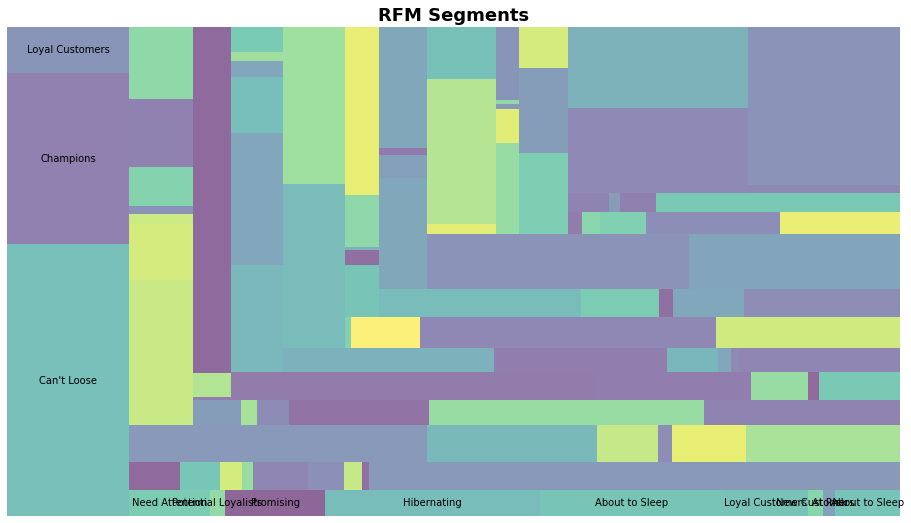

In [ ]:
fig = plt.gcf() 
ax = fig.add_subplot() 
fig.set_size_inches(16, 9) 
squarify.plot(sizes=rfm_level_ag['RFM_SCOREcount'], label=['Can\'t Loose', 'Champions', 'Loyal Customers', 'Need Attention', 'Potential Loyalists', 'Promising', 'Hibernating', 'About to Sleep', 'Loyal Customers', 'New Customers', 'At Risk', 'About to Sleep',], alpha=.6 ) 
plt.title("RFM Segments",fontsize=18,fontweight="bold") 
plt.axis('off') 
plt.show()